In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [419]:
data = pd.read_csv('patient_data.csv')

In [299]:
data.head()

,Sl.No,Patient #,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,1,Patient 1,NI,Male,24.0,NO,15.0,8.0,2.66,Vegetarian,Occasional,5.7,Fair,Negative
1,2,Patient 2,SI,Male,32.0,YES,27.0,9.0,1.27,NonVegetarian,Regular,4.1,Dark,Positive
2,3,Patient 3,SI,Male,28.0,YES,29.0,10.0,1.18,Vegetarian,Occasional,5.5,Wheatish,Negative
3,4,Patient 4,NE,NaN,33.0,NO,NaN,7.0,2.77,Vegetarian,NaN,5.2,NaN,Positive
4,5,Patient 5,NE,Female,58.0,NO,21.0,9.0,1.55,Vegetarian,Regular,5.6,Fair,Negative


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sl.No                       1010 non-null   int64  
 1   Patient #                   993 non-null    object 
 2   Region                      1009 non-null   object 
 3   Gender                      1005 non-null   object 
 4   Age                         1008 non-null   float64
 5   Smokes                      1007 non-null   object 
 6   No of Ciggarets per day     1009 non-null   float64
 7   No of Hrs Sleep per Day     1009 non-null   float64
 8   No of Hrs Exercise per Day  1008 non-null   object 
 9   Diet                        1004 non-null   object 
 10  Alcoholic                   1005 non-null   object 
 11  Height                      1007 non-null   float64
 12  Complexion                  1006 non-null   object 
 13  Cancer Diagnosis Result     1010 

In [353]:
### To Create the Simple report quickly
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)

In [5]:
profile = ProfileReport(data, title="Pandas Profiling Report")

## Exploratory data analysis

In [6]:
profile.to_notebook_iframe()

In [7]:
### No of Hrs Exercise per Day is considered as categorical due to special characters like 'Hrs', 'hrs' and so impuation and conversion is required

In [420]:
data['No of Hrs Exercise per Day'] = data['No of Hrs Exercise per Day'].str.replace(r'\D', '').astype(float)

In [421]:
### Smokes column was identified as boolen and so formating it to categorical for our study
data['Smokes'] = data['Smokes'].astype('object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sl.No                       1010 non-null   int64  
 1   Patient #                   993 non-null    object 
 2   Region                      1009 non-null   object 
 3   Gender                      1005 non-null   object 
 4   Age                         1008 non-null   float64
 5   Smokes                      1007 non-null   object 
 6   No of Ciggarets per day     1009 non-null   float64
 7   No of Hrs Sleep per Day     1009 non-null   float64
 8   No of Hrs Exercise per Day  1008 non-null   float64
 9   Diet                        1004 non-null   object 
 10  Alcoholic                   1005 non-null   object 
 11  Height                      1007 non-null   float64
 12  Complexion                  1006 non-null   object 
 13  Cancer Diagnosis Result     1010 

In [422]:
df= data.copy()

#### Based on the EDA  there are 8 categoriacl variable and 5 numerical variables so use this for analysis

## Numerical & categorical variables

In [423]:
#numerical variable
numerical_variables = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature not in ['Sl.No', 'Cancer Diagnosis Result']]
print('Number of numerical variable: ',len(numerical_variables))

Number of numerical variable:  5


In [424]:
#categorical variable
categorical_variables = [feature for feature in df.columns if df[feature].dtypes == 'O'and feature not in ['Patient #','Sl.No']]
print('Number of categorical variable: ',len(categorical_variables))


Number of categorical variable:  7


In [367]:
categorical_variables

['Region',
 'Gender',
 'Smokes',
 'Diet',
 'Alcoholic',
 'Complexion',
 'Cancer Diagnosis Result']

In [425]:
df.isnull().sum(), df.shape

(Sl.No                          0
 Patient #                     17
 Region                         1
 Gender                         5
 Age                            2
 Smokes                         3
 No of Ciggarets per day        1
 No of Hrs Sleep per Day        1
 No of Hrs Exercise per Day     2
 Diet                           6
 Alcoholic                      5
 Height                         3
 Complexion                     4
 Cancer Diagnosis Result        0
 dtype: int64,
 (1010, 14))

## Missing values

In [378]:
category_features_nan=[features for features in categorical_variables if df[feature].isnull().sum()>=1 and df[feature].dtypes=='O']
    
for feature in category_features_nan:
    print("{}: {} missing values".format(feature,np.round(df[feature].isnull().sum(),4)))

In [426]:
df1=df.copy()

In [427]:
## replace nan values with most frequently occuring values
for feature in categorical_variables:

  df1[feature] = df1[feature].fillna(df1[feature].value_counts().index[0]) 

In [428]:
df1.isnull().sum(), df1.shape

(Sl.No                          0
 Patient #                     17
 Region                         0
 Gender                         0
 Age                            2
 Smokes                         0
 No of Ciggarets per day        1
 No of Hrs Sleep per Day        1
 No of Hrs Exercise per Day     2
 Diet                           0
 Alcoholic                      0
 Height                         3
 Complexion                     0
 Cancer Diagnosis Result        0
 dtype: int64,
 (1010, 14))

### It si observed that all the missing categorical variables are replaced

In [386]:
df1.head()

,Sl.No,Patient #,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,1,Patient 1,NI,Male,24.0,NO,15.0,8.0,266.0,Vegetarian,Occasional,5.7,Fair,Negative
1,2,Patient 2,SI,Male,32.0,YES,27.0,9.0,127.0,NonVegetarian,Regular,4.1,Dark,Positive
2,3,Patient 3,SI,Male,28.0,YES,29.0,10.0,118.0,Vegetarian,Occasional,5.5,Wheatish,Negative
3,4,Patient 4,NE,Female,33.0,NO,NaN,7.0,277.0,Vegetarian,Regular,5.2,Brown,Positive
4,5,Patient 5,NE,Female,58.0,NO,21.0,9.0,155.0,Vegetarian,Regular,5.6,Fair,Negative


In [410]:
df2=df1.copy()

In [396]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df2.columns if df2[feature].isnull().sum()>=1 and df2[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {} missing value".format(feature,np.around(df2[feature].isnull().sum(),4)))

Age: 2 missing value
No of Ciggarets per day: 1 missing value
No of Hrs Sleep per Day: 1 missing value
No of Hrs Exercise per Day: 2 missing value
Height: 3 missing value


In [412]:
## Replacing the numerical Missing Values

imputer = KNNImputer(n_neighbors=2)
 ## We will replace by using median since there are outliers
df2[numerical_variables] = imputer.fit_transform(df2[numerical_variables])



### with KNN missing values has been imputed 

In [440]:
df2.isnull().sum(), df2.shape

(Sl.No                          0
 Patient #                     17
 Region                         0
 Gender                         0
 Age                            0
 Smokes                         0
 No of Ciggarets per day        0
 No of Hrs Sleep per Day        0
 No of Hrs Exercise per Day     0
 Diet                           0
 Alcoholic                      0
 Height                         0
 Complexion                     0
 Cancer Diagnosis Result        0
 dtype: int64,
 (1010, 14))

## Encoding categorical variables

In [662]:
df3= df2.copy()

In [659]:
df3.info(), df3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sl.No                       1010 non-null   int64  
 1   Patient #                   993 non-null    object 
 2   Region                      1010 non-null   object 
 3   Gender                      1010 non-null   object 
 4   Age                         1010 non-null   float64
 5   Smokes                      1010 non-null   object 
 6   No of Ciggarets per day     1010 non-null   float64
 7   No of Hrs Sleep per Day     1010 non-null   float64
 8   No of Hrs Exercise per Day  1010 non-null   float64
 9   Diet                        1010 non-null   object 
 10  Alcoholic                   1010 non-null   object 
 11  Height                      1010 non-null   float64
 12  Complexion                  1010 non-null   object 
 13  Cancer Diagnosis Result     1010 

(None, (1010, 14))

In [670]:
for feature in categorical_variables:
  df4 = pd.get_dummies(df3[categorical_variables], drop_first= True)

In [671]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Region_NE                         1010 non-null   uint8
 1   Region_NI                         1010 non-null   uint8
 2   Region_NL                         1010 non-null   uint8
 3   Region_S1                         1010 non-null   uint8
 4   Region_SI                         1010 non-null   uint8
 5   Gender_Male                       1010 non-null   uint8
 6   Smokes_YES                        1010 non-null   uint8
 7   Diet_Vegetarian                   1010 non-null   uint8
 8   Alcoholic_Regular                 1010 non-null   uint8
 9   Complexion_Dark                   1010 non-null   uint8
 10  Complexion_Fair                   1010 non-null   uint8
 11  Complexion_Wheatish               1010 non-null   uint8
 12  Cancer Diagnosis Result_Positive  

In [661]:
### df3[categorical_variables]= pd.get_dummies(df3[categorical_variables], drop_first= True).head()

,Sl.No,Patient #,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,1,Patient 1,NI,Male,24.0,NO,15.0,8.0,266.0,Vegetarian,Occasional,5.7,Fair,0.0
1,2,Patient 2,SI,Male,32.0,YES,27.0,9.0,127.0,NonVegetarian,Regular,4.1,Dark,1.0
2,3,Patient 3,SI,Male,28.0,YES,29.0,10.0,118.0,Vegetarian,Occasional,5.5,Wheatish,0.0
3,4,Patient 4,NE,Female,33.0,NO,25.0,7.0,277.0,Vegetarian,Regular,5.2,Brown,1.0
4,5,Patient 5,NE,Female,58.0,NO,21.0,9.0,155.0,Vegetarian,Regular,5.6,Fair,0.0


In [673]:
df5= pd.concat([df3, df4], axis = 1 )

In [674]:
df5.isnull().sum()

Sl.No                                0
Patient #                           17
Region                               0
Gender                               0
Age                                  0
Smokes                               0
No of Ciggarets per day              0
No of Hrs Sleep per Day              0
No of Hrs Exercise per Day           0
Diet                                 0
Alcoholic                            0
Height                               0
Complexion                           0
Cancer Diagnosis Result              0
Region_NE                            0
Region_NI                            0
Region_NL                            0
Region_S1                            0
Region_SI                            0
Gender_Male                          0
Smokes_YES                           0
Diet_Vegetarian                      0
Alcoholic_Regular                    0
Complexion_Dark                      0
Complexion_Fair                      0
Complexion_Wheatish      

In [675]:
# Lets remove original columns after encoding

Drop_variable = [feature for feature in df5.columns if feature not in categorical_variables]

for feature in Drop_variable:
 df5= df5[Drop_variable]

In [676]:
df5.head()

,Sl.No,Patient #,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_NL,Region_S1,Region_SI,Gender_Male,Smokes_YES,Diet_Vegetarian,Alcoholic_Regular,Complexion_Dark,Complexion_Fair,Complexion_Wheatish,Cancer Diagnosis Result_Positive
0,1,Patient 1,24.0,15.0,8.0,266.0,5.7,0,1,0,0,0,1,0,1,0,0,1,0,0
1,2,Patient 2,32.0,27.0,9.0,127.0,4.1,0,0,0,0,1,1,1,0,1,1,0,0,1
2,3,Patient 3,28.0,29.0,10.0,118.0,5.5,0,0,0,0,1,1,1,1,0,0,0,1,0
3,4,Patient 4,33.0,25.0,7.0,277.0,5.2,1,0,0,0,0,0,0,1,1,0,0,0,1
4,5,Patient 5,58.0,21.0,9.0,155.0,5.6,1,0,0,0,0,0,0,1,1,0,1,0,0


## Skewness

### The variables are skewed as per EDA and so we take log transformation for normalizing it

In [677]:
for feature in numerical_variables:
    df5[feature]=np.log(df5[feature])

In [678]:
df5.head()

,Sl.No,Patient #,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_NL,Region_S1,Region_SI,Gender_Male,Smokes_YES,Diet_Vegetarian,Alcoholic_Regular,Complexion_Dark,Complexion_Fair,Complexion_Wheatish,Cancer Diagnosis Result_Positive
0,1,Patient 1,3.178054,2.708050,2.079442,5.583496,1.740466,0,1,0,0,0,1,0,1,0,0,1,0,0
1,2,Patient 2,3.465736,3.295837,2.197225,4.844187,1.410987,0,0,0,0,1,1,1,0,1,1,0,0,1
2,3,Patient 3,3.332205,3.367296,2.302585,4.770685,1.704748,0,0,0,0,1,1,1,1,0,0,0,1,0
3,4,Patient 4,3.496508,3.218876,1.945910,5.624018,1.648659,1,0,0,0,0,0,0,1,1,0,0,0,1
4,5,Patient 5,4.060443,3.044522,2.197225,5.043425,1.722767,1,0,0,0,0,0,0,1,1,0,1,0,0


## Outlier detection

In [679]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df5[numerical_variables]))
threshold = 3
print(np.where(z > 3))

(array([ 58,  62,  65,  81,  86,  99, 101, 128, 132, 140, 145, 164, 167,
       172, 193, 255, 256, 286, 303, 308, 312, 348, 423, 445, 459, 470,
       479, 481, 489, 522, 532, 610, 616, 621, 629, 650, 651, 652, 670,
       674, 682, 715, 722, 749, 765, 788, 816, 825, 863, 870, 896, 897,
       905, 924, 988, 991, 998], dtype=int64), array([1, 3, 3, 1, 3, 0, 1, 0, 1, 1, 1, 3, 1, 0, 3, 3, 1, 1, 1, 3, 1, 3,
       3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1,
       3, 3, 3, 1, 1, 0, 3, 3, 1, 1, 1, 3, 3], dtype=int64))


#### there are the values with more than 3 standard deviation away from the maen and so we will consider everything lesser than z=3

In [680]:
df5 = df5[(z < 3).all(axis=1)]

In [611]:
df5.head()

,Sl.No,Patient #,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_NL,Region_S1,Region_SI,Gender_Male,Smokes_YES,Diet_Vegetarian,Alcoholic_Regular,Complexion_Dark,Complexion_Fair,Complexion_Wheatish,Cancer Diagnosis Result_Positive
0,1,Patient 1,3.178054,2.708050,2.079442,5.583496,1.740466,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,Patient 2,3.465736,3.295837,2.197225,4.844187,1.410987,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,3,Patient 3,3.332205,3.367296,2.302585,4.770685,1.704748,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,Patient 4,3.496508,3.218876,1.945910,5.624018,1.648659,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,5,Patient 5,4.060443,3.044522,2.197225,5.043425,1.722767,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [681]:
df5.isnull().sum()

Sl.No                                0
Patient #                           16
Age                                  0
No of Ciggarets per day              0
No of Hrs Sleep per Day              0
No of Hrs Exercise per Day           0
Height                               0
Region_NE                            0
Region_NI                            0
Region_NL                            0
Region_S1                            0
Region_SI                            0
Gender_Male                          0
Smokes_YES                           0
Diet_Vegetarian                      0
Alcoholic_Regular                    0
Complexion_Dark                      0
Complexion_Fair                      0
Complexion_Wheatish                  0
Cancer Diagnosis Result_Positive     0
dtype: int64

## Feature Scaling

In [697]:
from sklearn.preprocessing import MinMaxScaler
df6= df5.copy()

#### Lets remove 'Sl No' and 'Patient #' from our analysis

In [ ]:
cat_list = [feature for feature in df6.columns if feature not in numerical_variables and feature not in ['Sl.No','Patient #']]

In [730]:
feature_scale=[feature for feature in df6.columns if feature in numerical_variables and feature not in ['Sl.No','Patient #','Cancer Diagnosis Result_Positive' ]]

scaler=MinMaxScaler()
scaler.fit(df6[feature_scale])
df6_x = pd.DataFrame(scaler.fit_transform(df6[feature_scale]), columns = feature_scale)

In [731]:
df6_x.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height
0,0.118632,0.744042,0.563171,0.974587,0.873495
1,0.305819,0.961094,0.793745,0.813931,0.060899
2,0.218934,0.987481,1.000000,0.797959,0.785404
3,0.325842,0.932674,0.301768,0.983392,0.647070
4,0.692780,0.868291,0.793745,0.857227,0.829843


In [732]:
# transform the 
dataset = pd.concat([df6_x, df6[cat_list].reset_index(drop = True)], axis=1)

In [733]:
dataset.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_NL,Region_S1,Region_SI,Gender_Male,Smokes_YES,Diet_Vegetarian,Alcoholic_Regular,Complexion_Dark,Complexion_Fair,Complexion_Wheatish,Cancer Diagnosis Result_Positive
0,0.118632,0.744042,0.563171,0.974587,0.873495,0,1,0,0,0,1,0,1,0,0,1,0,0
1,0.305819,0.961094,0.793745,0.813931,0.060899,0,0,0,0,1,1,1,0,1,1,0,0,1
2,0.218934,0.987481,1.000000,0.797959,0.785404,0,0,0,0,1,1,1,1,0,0,0,1,0
3,0.325842,0.932674,0.301768,0.983392,0.647070,1,0,0,0,0,0,0,1,1,0,0,0,1
4,0.692780,0.868291,0.793745,0.857227,0.829843,1,0,0,0,0,0,0,1,1,0,1,0,0


#### Now the data is between scale of 0 to 1.

## Correlation

### As per EDA it was observed that there was no correlation between variables, however lets check again for increased variables

In [739]:
import seaborn as sns
from matplotlib import pyplot as plt

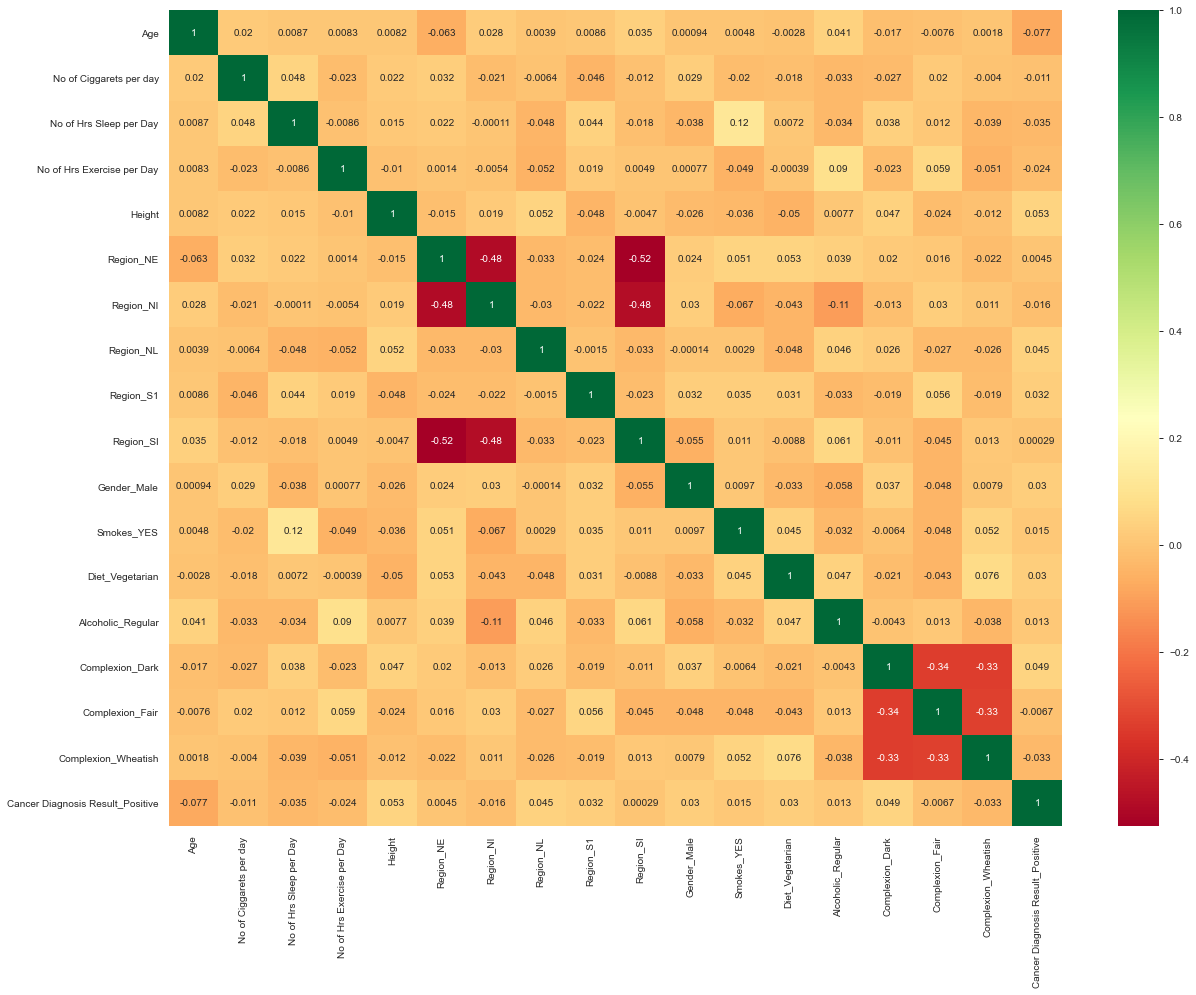

In [740]:
#Lets plot heat map to visualize the data
corrmat = dataset.corr()
top_corr_features = corrmat.index


plt.subplots(figsize=(20,15))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [826]:
X.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_NL,Region_S1,Region_SI,Gender_Male,Smokes_YES,Diet_Vegetarian,Alcoholic_Regular,Complexion_Dark,Complexion_Fair,Complexion_Wheatish
0,0.118632,0.744042,0.563171,0.974587,0.873495,0,1,0,0,0,1,0,1,0,0,1,0
1,0.305819,0.961094,0.793745,0.813931,0.060899,0,0,0,0,1,1,1,0,1,1,0,0
2,0.218934,0.987481,1.000000,0.797959,0.785404,0,0,0,0,1,1,1,1,0,0,0,1
3,0.325842,0.932674,0.301768,0.983392,0.647070,1,0,0,0,0,0,0,1,1,0,0,0
4,0.692780,0.868291,0.793745,0.857227,0.829843,1,0,0,0,0,0,0,1,1,0,1,0


## Independent and dependent variable

In [824]:
## Capture the dependent feature
Y=dataset[['Cancer Diagnosis Result_Positive']]

In [825]:
## drop dependent feature from dataset
X=dataset.drop(['Cancer Diagnosis Result_Positive'],axis=1)

#### From the heat map it is observed that there is no much correlation in the data

## Feature selection

### Utilizing lasso regression for feature selection

In [831]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# considering an initial alpha value of 0.05 for learning
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

feature_sel_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

### Lets tume the parameters for better selection

In [750]:
# lets identify the selected features
feature_sel_model.get_support()

array([ True, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True])

In [751]:
#lets make a list from this features
selected_feat = X.columns[(feature_sel_model.get_support())]

In [754]:
# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 17
selected features: 7


In [838]:
selected_feat

Index(['Age', 'No of Hrs Sleep per Day', 'Height', 'Gender_Male',
       'Diet_Vegetarian', 'Complexion_Dark', 'Complexion_Wheatish'],
      dtype='object')

In [839]:
X1=X[selected_feat]

In [841]:
X1.head()

,Age,No of Hrs Sleep per Day,Height,Gender_Male,Diet_Vegetarian,Complexion_Dark,Complexion_Wheatish
0,0.118632,0.563171,0.873495,1,1,0,0
1,0.305819,0.793745,0.060899,1,0,1,0
2,0.218934,1.000000,0.785404,1,1,0,1
3,0.325842,0.301768,0.647070,0,1,0,0
4,0.692780,0.793745,0.829843,0,1,0,0


## Train Test Split

In [776]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.25, random_state = 0)

##  Logistic Regression

In [842]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score,log_loss

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)



#predicting the test results
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[50 71]
 [44 74]]
              precision    recall  f1-score   support

           0       0.53      0.41      0.47       121
           1       0.51      0.63      0.56       118

    accuracy                           0.52       239
   macro avg       0.52      0.52      0.51       239
weighted avg       0.52      0.52      0.51       239

Accuracy: 0.5188284518828452


C:\Users\Sazid\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Accuracy is very low and lets try with tree based models considering all the features

In [843]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Random Forest

In [844]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest =RandomForestClassifier(random_state=42)
Random_Forest.fit(X_train1,y_train1)

#predicting the test results
y_pred = Random_Forest.predict(X_test1)

print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
print("Accuracy:",accuracy_score(y_test1, y_pred))

C:\Users\Sazid\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[60 61]
 [55 63]]
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       121
           1       0.51      0.53      0.52       118

    accuracy                           0.51       239
   macro avg       0.51      0.51      0.51       239
weighted avg       0.51      0.51      0.51       239

Accuracy: 0.5146443514644351


## XGBOOST

In [845]:
import xgboost

XGBoost = xgboost.XGBClassifier()
XGBoost.fit(X_train1,y_train1)

#predicting the test results
y_pred = XGBoost.predict(X_test1)

print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
print("Accuracy:",accuracy_score(y_test1, y_pred))

C:\Users\Sazid\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sazid\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[68 53]
 [61 57]]
              precision    recall  f1-score   support

           0       0.53      0.56      0.54       121
           1       0.52      0.48      0.50       118

    accuracy                           0.52       239
   macro avg       0.52      0.52      0.52       239
weighted avg       0.52      0.52      0.52       239

Accuracy: 0.5230125523012552


## KNN

In [846]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train1, y_train1)

#predicting the test results
y_pred = knn.predict(X_test1)



print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))

print("Accuracy:",accuracy_score(y_test1, y_pred))

[[68 53]
 [52 66]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.56       121
           1       0.55      0.56      0.56       118

    accuracy                           0.56       239
   macro avg       0.56      0.56      0.56       239
weighted avg       0.56      0.56      0.56       239

Accuracy: 0.5606694560669456


C:\Users\Sazid\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


### of the three models KNN seems to  give  a better accuracy

## Tuning KNN

C:\Users\Sazid\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Sazid\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Sazid\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Sazid\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Sazid\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A

Text(0, 0.5, 'Error Rate')

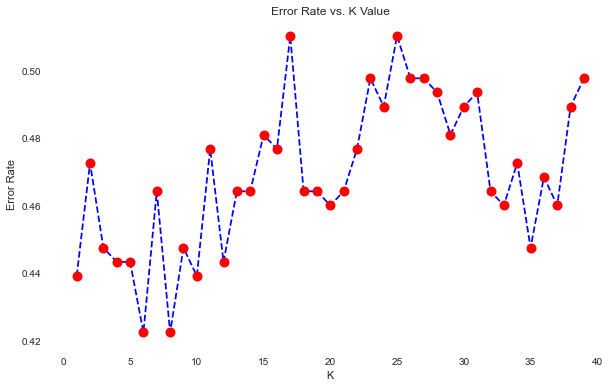

In [854]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1,y_train1)
    pred_i = knn.predict(X_test1)
    pred_i = pred_i.reshape(239, 1)
    error_rate.append(np.mean(pred_i != y_test1))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### It was observed after k values of 6, 9 and 13 a clear elbow is observed, lets tune using these values

In [858]:
#Lets try  K=6
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train1,y_train1)
y_pred = knn.predict(X_test1)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
print("Accuracy:",accuracy_score(y_test1, y_pred))

WITH K=6


[[89 32]
 [69 49]]
              precision    recall  f1-score   support

           0       0.56      0.74      0.64       121
           1       0.60      0.42      0.49       118

    accuracy                           0.58       239
   macro avg       0.58      0.58      0.57       239
weighted avg       0.58      0.58      0.57       239

Accuracy: 0.5774058577405857


C:\Users\Sazid\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [859]:
# Lets try  K=9
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train1,y_train1)
y_pred = knn.predict(X_test1)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
print("Accuracy:",accuracy_score(y_test1, y_pred))

WITH K=9


[[66 55]
 [52 66]]
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       121
           1       0.55      0.56      0.55       118

    accuracy                           0.55       239
   macro avg       0.55      0.55      0.55       239
weighted avg       0.55      0.55      0.55       239

Accuracy: 0.5523012552301255


C:\Users\Sazid\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [860]:
# Lets try  K=13
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train1,y_train1)
y_pred = knn.predict(X_test1)

print('WITH K=13')
print('\n')
print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
print("Accuracy:",accuracy_score(y_test1, y_pred))

WITH K=13


[[61 60]
 [51 67]]
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       121
           1       0.53      0.57      0.55       118

    accuracy                           0.54       239
   macro avg       0.54      0.54      0.54       239
weighted avg       0.54      0.54      0.54       239

Accuracy: 0.5355648535564853


C:\Users\Sazid\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


## Hyperparameter tuning on XGboost

In [848]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

classifier=xgboost.XGBClassifier()

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train1,y_train1)
random_search.best_estimator_
random_search.best_params_



Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.1s finished
C:\Users\Sazid\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sazid\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [850]:
#lets apply parameters to the model

XGBoost=xgboost.XGBClassifier(min_child_weight= 1,
 max_depth= 3,
 learning_rate= 0.2,
 gamma= 0.3,
 colsample_bytree= 0.7)

XGBoost.fit(X_train1,y_train1)

#predicting the test results
y_pred = XGBoost.predict(X_test1)

print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
print("Accuracy:",accuracy_score(y_test1, y_pred))

[[64 57]
 [68 50]]
              precision    recall  f1-score   support

           0       0.48      0.53      0.51       121
           1       0.47      0.42      0.44       118

    accuracy                           0.48       239
   macro avg       0.48      0.48      0.48       239
weighted avg       0.48      0.48      0.48       239

Accuracy: 0.4769874476987448


### Hyperparameter tuning disnt result in better result 

### Feature Importance

In [861]:
# extract the numerical values of feature importance from the random search
importances = random_search.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance                     feature
0     0.094425                   Region_NE
1     0.090776                   Region_NI
2     0.079908                 Gender_Male
3     0.077112           Alcoholic_Regular
4     0.072013                         Age
5     0.069414     No of Ciggarets per day
6     0.066068                   Region_SI
7     0.065327             Complexion_Dark
8     0.065315             Complexion_Fair
9     0.064830                  Smokes_YES
10    0.056585  No of Hrs Exercise per Day
11    0.053205     No of Hrs Sleep per Day
12    0.051680         Complexion_Wheatish
13    0.051611                      Height
14    0.041730             Diet_Vegetarian
15    0.000000                   Region_S1
16    0.000000                   Region_NL


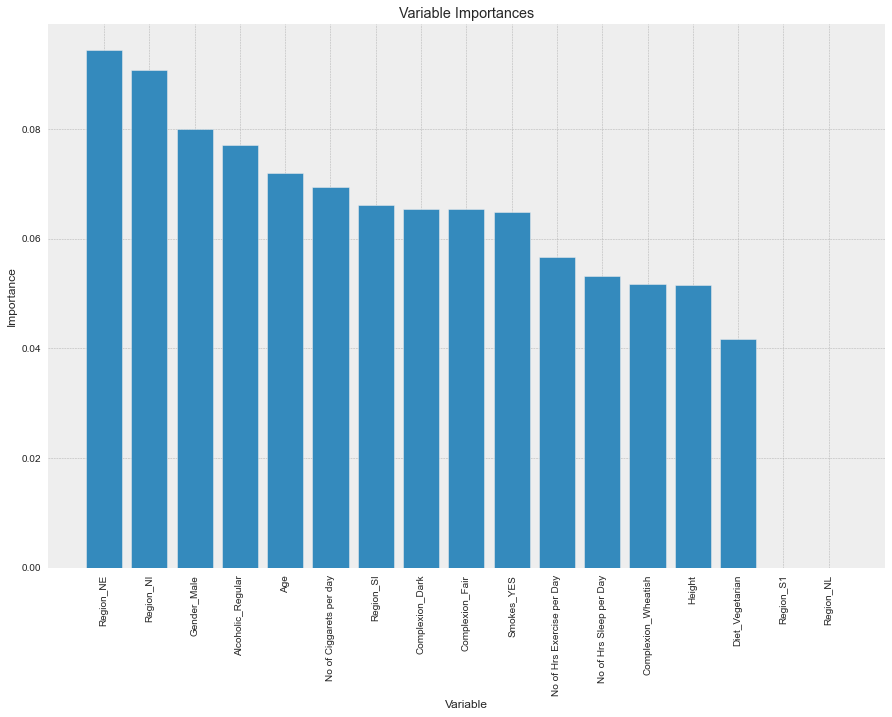

In [862]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## PCA- Principal component analysis

In [863]:
### Lets try to reduce the dimension and see if there is any significant effect on the model

In [864]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train2 = pca.fit_transform(X_train1)
X_test2 = pca.transform(X_test1)


In [ ]:
#Applying on KNN=9 to check the performance

In [865]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train2,y_train1)
y_pred = knn.predict(X_test2)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
print("Accuracy:",accuracy_score(y_test1, y_pred))

WITH K=9


[[56 65]
 [50 68]]
              precision    recall  f1-score   support

           0       0.53      0.46      0.49       121
           1       0.51      0.58      0.54       118

    accuracy                           0.52       239
   macro avg       0.52      0.52      0.52       239
weighted avg       0.52      0.52      0.52       239

Accuracy: 0.5188284518828452


C:\Users\Sazid\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## PCA didnt result in better accuracy and so KNN = 9 is considered the best accuracy

## as per which based on the feature imprtance a precision of near to 55% was observed and so 55% of the poulation is predicted to get cancer as behaviour observed in the features

## Additional features might be necessary for increasing the accuracy